# Importing the Dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from xgboost import XGBRFRegressor
from sklearn import metrics

# Importing the Boston House Price dataset

In [2]:
house_price_dataset = pd.read_csv('boston_house_prices.csv')
house_price_dataset

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [3]:
house_price_dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
# check shape
house_price_dataset.shape

(506, 14)

In [5]:
# check for missing values
house_price_dataset.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
price      0
dtype: int64

In [6]:
# statustical measure of the dataset
house_price_dataset.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


# Understanding the correlation between various features in the dataset
    1.Positive Correlation
    2.Negative Correlation

In [8]:
correlation = house_price_dataset.corr()
correlation

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


<Axes: >

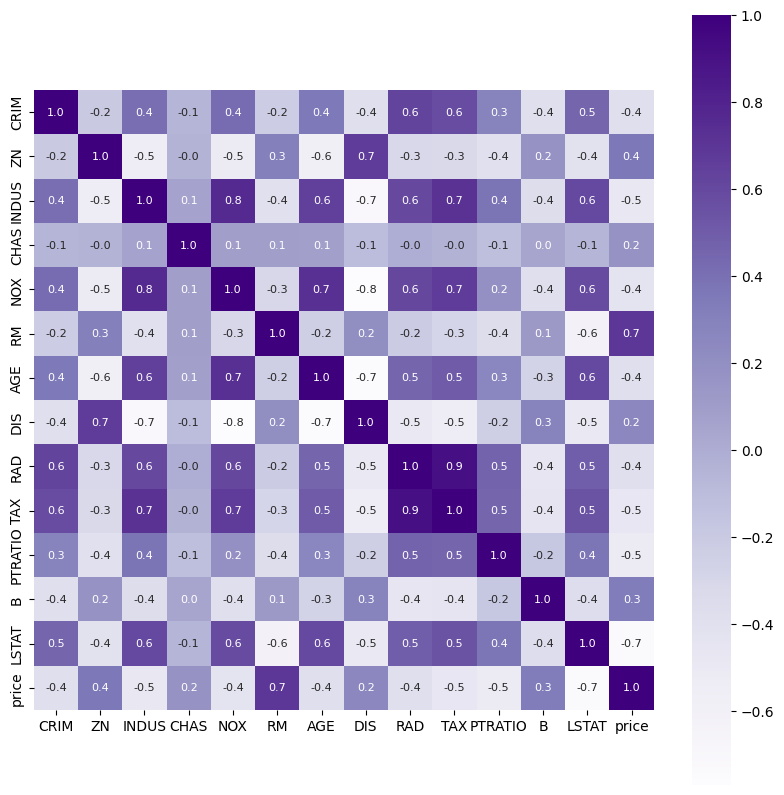

In [12]:
# constracting a heatmap to understan the correlation
plt.figure(figsize=(10,10))
sns.heatmap(correlation,cbar=True,annot=True,fmt='.1f',square=True,annot_kws={'size':8},cmap='Purples')

# Spliting the data and Target

In [13]:
x = house_price_dataset.drop(['price'],axis=1)
y = house_price_dataset['price']

In [14]:
print(x)

        CRIM    ZN  INDUS  CHAS    NOX  ...  RAD  TAX  PTRATIO       B  LSTAT
0    0.00632  18.0   2.31     0  0.538  ...    1  296     15.3  396.90   4.98
1    0.02731   0.0   7.07     0  0.469  ...    2  242     17.8  396.90   9.14
2    0.02729   0.0   7.07     0  0.469  ...    2  242     17.8  392.83   4.03
3    0.03237   0.0   2.18     0  0.458  ...    3  222     18.7  394.63   2.94
4    0.06905   0.0   2.18     0  0.458  ...    3  222     18.7  396.90   5.33
..       ...   ...    ...   ...    ...  ...  ...  ...      ...     ...    ...
501  0.06263   0.0  11.93     0  0.573  ...    1  273     21.0  391.99   9.67
502  0.04527   0.0  11.93     0  0.573  ...    1  273     21.0  396.90   9.08
503  0.06076   0.0  11.93     0  0.573  ...    1  273     21.0  396.90   5.64
504  0.10959   0.0  11.93     0  0.573  ...    1  273     21.0  393.45   6.48
505  0.04741   0.0  11.93     0  0.573  ...    1  273     21.0  396.90   7.88

[506 rows x 13 columns]


In [15]:
print(y)

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: price, Length: 506, dtype: float64


# Spliting the data into Training data Test data

In [16]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [17]:
print('x shape:...',x.shape)
print('x_train shape:...',x_train.shape)
print('x_test shape:...',x_test.shape)

x shape:... (506, 13)
x_train shape:... (404, 13)
x_test shape:... (102, 13)


# Model Training

# XGBoost Regressor

In [18]:
# loading the model
model = XGBRFRegressor()

In [19]:
# training the model with x_train
model.fit(x_train,y_train)

XGBRFRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bytree=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, gamma=None, gpu_id=None,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               n_estimators=100, n_jobs=None, num_parallel_tree=None,
               objective='reg:squarederror', predictor=None, random_state=None,
               reg_alpha=None, ...)

# Evaluation

# Prediction on training data

In [20]:
# accuracy for prediciton on training data
training_data_prediction = model.predict(x_train)
training_data_prediction

array([24.031755 , 21.047308 , 21.497105 , 34.013016 , 15.425952 ,
       14.656247 , 21.623457 , 15.041835 , 11.798775 , 21.11584  ,
       14.69962  ,  8.139541 , 27.655315 , 49.5058   , 32.882782 ,
       20.602232 , 21.247454 , 20.672434 , 32.884666 , 20.692133 ,
       24.60163  ,  9.074767 , 45.385834 , 21.156752 , 21.633188 ,
       20.46409  , 20.60355  , 24.9835   , 20.963558 , 32.201996 ,
       21.248463 ,  9.315684 , 19.95601  , 20.92258  , 12.554594 ,
        9.761415 , 11.904919 , 21.768782 , 19.32304  , 14.908623 ,
       24.023077 , 26.530916 , 15.017096 , 16.526756 , 15.728144 ,
       15.257161 , 26.045284 , 17.4497   , 48.940086 , 18.962856 ,
       21.073849 , 32.019493 , 16.951841 , 23.88547  , 20.720171 ,
       20.85021  , 21.289558 , 35.30439  , 30.605204 , 32.724842 ,
       21.650215 , 48.739124 , 15.006739 ,  8.12192  , 23.044893 ,
       10.098855 , 25.390867 , 18.580639 , 21.372717 , 46.356697 ,
       40.22479  , 33.83026  , 22.659693 , 33.77894  , 24.2051

# R squared Error

In [24]:
score_1 = metrics.r2_score(y_train,training_data_prediction)
print('R squared error:...',score_1)

R squared error:... 0.9628425719430932


# Mean Absolute Error

In [27]:
score_2 = metrics.mean_absolute_error(y_train,training_data_prediction)
score_2
print('Mean absolute Error:...',score_2)

Mean absolute Error:... 1.38187467745035


# Prediction on test data

In [29]:
# Accuracy for prediction on test data
test_data_prediction = model.predict(x_test)
test_data_prediction

array([20.825747 , 21.025257 , 32.036167 , 29.023102 ,  8.315279 ,
       14.449349 , 27.804474 , 29.176626 , 25.369192 , 21.200712 ,
       25.937006 , 24.616169 , 21.037912 , 20.671644 , 11.710144 ,
       23.062166 , 17.89905  , 10.828854 ,  8.996215 , 14.894245 ,
       23.777227 , 20.66856  , 33.52307  , 18.016047 , 13.695692 ,
       20.223003 , 42.72827  , 32.98532  , 33.450954 , 21.040606 ,
       19.173086 , 20.768839 , 30.163277 , 24.824068 , 11.637277 ,
       15.625191 , 10.474557 , 20.973385 , 21.33607  , 21.23488  ,
       24.716425 , 15.465717 , 29.839842 ,  8.006884 , 20.664038 ,
       13.631439 , 34.158237 , 15.43135  , 32.883553 , 15.062172 ,
       29.342562 , 26.480257 ,  7.7381034, 33.05451  , 28.924572 ,
       20.634075 , 20.333298 , 19.844604 , 16.160223 , 20.559153 ,
       20.86993  , 22.39253  , 19.495983 , 29.674124 , 31.194029 ,
       24.871235 , 48.95768  , 26.95628  , 11.131715 , 23.02556  ,
       17.226816 ,  8.488453 , 21.056154 , 17.202751 , 25.2348

In [31]:
score_1 = metrics.r2_score(y_test,test_data_prediction)
print('R squared error:...',score_1)

R squared error:... 0.8996092706735491


In [32]:
score_2 = metrics.mean_absolute_error(y_test,test_data_prediction)
score_2
print('Mean absolute Error:...',score_2)

Mean absolute Error:... 2.1216835199617865


# Visualize the Actual Price and Predicted Prices

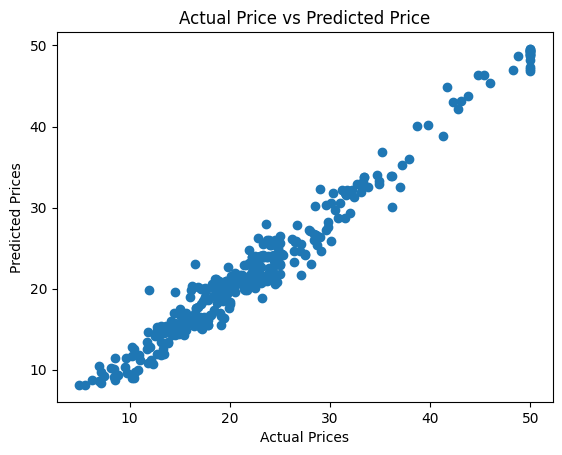

In [33]:
plt.scatter(y_train,training_data_prediction)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Price vs Predicted Price')
plt.show()